# Analysis on the winners of the DPOY award
## Exploring and creating the necessary dataframe

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

First of all let's see the data containing information about the winners, save the important data and save the year when the DPOY started to be awarded.

In [10]:
df_player_awards = pd.read_csv('awards.csv')
df_player_awards.head()

,season,award,player,age,tm,first,pts_won,pts_max,share,winner,seas_id,player_id
0,2022,dpoy,Marcus Smart,27,BOS,37.0,257.0,500.0,0.514,True,30183,4275
1,2022,dpoy,Mikal Bridges,25,PHO,22.0,202.0,500.0,0.404,False,30205,4658
2,2022,dpoy,Rudy Gobert,29,UTA,12.0,136.0,500.0,0.272,False,30313,4199
3,2022,dpoy,Bam Adebayo,24,MIA,13.0,128.0,500.0,0.256,False,29689,4472
4,2022,dpoy,Jaren Jackson Jr.,22,MEM,10.0,99.0,500.0,0.198,False,29991,4632


In [11]:
df_dpoy = df_player_awards.loc[(df_player_awards['award']=='dpoy') & (df_player_awards['winner']), ['seas_id', 'player_id']]
first_season = df_dpoy['seas_id'].min()
df_dpoy.describe()

,seas_id,player_id
count,40.000000,40.000000
mean,18650.100000,2996.575000
std,6293.061086,771.561716
min,9435.000000,1823.000000
25%,13195.000000,2301.000000
50%,18035.500000,2953.500000
75%,23993.250000,3580.750000
max,30183.000000,4275.000000


After this we can import the data containing the performances of players. We will use the performance per 100 posessions, because it helps us the most when comparing players from different time periods. We need only the data from that very first season.

In [12]:
df_per_100 = pd.read_csv('per100poss.csv')
df_per_100 = df_per_100[df_per_100['seas_id'] >= first_season]
df_per_100.describe()

,seas_id,season,player_id,birth_year,age,experience,g,gs,mp,fg_per_100_poss,...,drb_per_100_poss,trb_per_100_poss,ast_per_100_poss,stl_per_100_poss,blk_per_100_poss,tov_per_100_poss,pf_per_100_poss,pts_per_100_poss,o_rtg,d_rtg
count,21516.000000,21516.000000,21516.000000,424.000000,21516.000000,21516.000000,21516.000000,21516.000000,21516.000000,21511.000000,...,21511.000000,21511.000000,21511.000000,21511.000000,21511.000000,21511.000000,21511.000000,21511.000000,21443.000000,21511.000000
mean,20192.500000,2005.312605,3271.917224,1967.528302,26.731223,5.453198,46.998373,22.304332,1092.678379,7.159504,...,6.297620,8.944452,4.273218,1.624453,1.038631,3.078927,5.328767,18.953066,102.536772,107.679792
std,6211.278532,11.320919,832.197667,12.974212,4.080327,3.923139,26.618047,27.769796,898.588312,2.780205,...,3.159821,4.639424,3.136693,1.076591,1.281759,1.841090,2.826526,7.189996,18.065492,5.025516
min,9435.000000,1983.000000,1101.000000,1947.000000,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
25%,14813.750000,1996.000000,2593.000000,1956.000000,24.000000,2.000000,23.000000,0.000000,277.000000,5.500000,...,4.100000,5.500000,2.100000,1.100000,0.300000,2.200000,3.700000,14.600000,97.000000,105.000000
50%,20192.500000,2006.000000,3268.000000,1965.000000,26.000000,4.000000,50.000000,7.000000,896.000000,7.100000,...,5.800000,8.100000,3.400000,1.500000,0.700000,2.900000,4.800000,18.700000,105.000000,108.000000
75%,25571.250000,2015.000000,3914.000000,1980.000000,29.000000,8.000000,72.000000,41.000000,1776.000000,8.700000,...,8.100000,11.900000,5.800000,2.000000,1.400000,3.700000,6.400000,23.000000,111.000000,111.000000
max,30950.000000,2023.000000,5095.000000,2002.000000,44.000000,22.000000,85.000000,83.000000,3533.000000,52.600000,...,106.100000,106.100000,49.000000,25.000000,54.400000,53.300000,99.800000,159.800000,300.000000,126.000000


Now we can expand this dataframe with a minutes per game column and one that indicates the DPOY winners.

In [13]:
df_per_100['mp/g'] = df_per_100['mp']/df_per_100['g']
df_dpoy['dpoy'] = 1
df_per_100 = df_per_100.merge(df_dpoy, how='left', on=['seas_id', 'player_id'])
df_per_100['dpoy'] = df_per_100['dpoy'].fillna(0)
df_per_100['mp/g'].describe()

count    21516.000000
mean        19.695304
std         10.122400
min          0.000000
25%         11.307692
50%         18.933771
75%         27.983999
max         44.500000
Name: mp/g, dtype: float64

Let's see how many values are missing.

In [14]:
df_per_100.isna().sum()

seas_id                  0
season                   0
player_id                0
player                   0
birth_year           21092
pos                      0
age                      0
experience               0
lg                       0
tm                       0
g                        0
gs                       0
mp                       0
fg_per_100_poss          5
fga_per_100_poss         5
fg_percent             122
x3p_per_100_poss         5
x3pa_per_100_poss        5
x3p_percent           3472
x2p_per_100_poss         5
x2pa_per_100_poss        5
x2p_percent            202
ft_per_100_poss          5
fta_per_100_poss         5
ft_percent            1015
orb_per_100_poss         5
drb_per_100_poss         5
trb_per_100_poss         5
ast_per_100_poss         5
stl_per_100_poss         5
blk_per_100_poss         5
tov_per_100_poss         5
pf_per_100_poss          5
pts_per_100_poss         5
o_rtg                   73
d_rtg                    5
mp/g                     0
d

By intuition I suppose that most of missing values are present at players who have played only a few minutes, games. Because I already want to drop these rows, let's do that now. I select the threshold of having a chance to win this award to the minimum it has ever happened(I do not want this threshold to be less or analyze this question more because there were seasons with fewer games than usual, that is 82):

In [18]:
threshold = min(df_per_100.loc[df_per_100['dpoy']==1, 'g'])
df_per_100 = df_per_100[df_per_100['g'] >= threshold]

In [19]:
df_per_100.isna().sum()

seas_id                  0
season                   0
player_id                0
player                   0
birth_year           11538
pos                      0
age                      0
experience               0
lg                       0
tm                       0
g                        0
gs                       0
mp                       0
fg_per_100_poss          0
fga_per_100_poss         0
fg_percent               0
x3p_per_100_poss         0
x3pa_per_100_poss        0
x3p_percent            952
x2p_per_100_poss         0
x2pa_per_100_poss        0
x2p_percent              0
ft_per_100_poss          0
fta_per_100_poss         0
ft_percent               1
orb_per_100_poss         0
drb_per_100_poss         0
trb_per_100_poss         0
ast_per_100_poss         0
stl_per_100_poss         0
blk_per_100_poss         0
tov_per_100_poss         0
pf_per_100_poss          0
pts_per_100_poss         0
o_rtg                    0
d_rtg                    0
mp/g                     0
d

In [20]:
df_per_100.drop(columns=['birth_year'], inplace=True)
df_per_100[['x3p_percent', 'ft_percent']] = df_per_100[['x3p_percent', 'ft_percent']].fillna(0)

In [35]:
df_dpoy = df_per_100[df_per_100['dpoy']==1]

In [22]:
df_extremes = df_dpoy[df_dpoy['age'] == df_dpoy['age'].min()]
df_extremes = df_extremes.append(df_dpoy[df_dpoy['age'] == df_dpoy['age'].max()])
df_extremes = df_extremes.append(df_dpoy[df_dpoy['gs'] == df_dpoy['gs'].min()])

In [23]:
df_extremes

,seas_id,season,player_id,player,pos,age,experience,lg,tm,g,...,ast_per_100_poss,stl_per_100_poss,blk_per_100_poss,tov_per_100_poss,pf_per_100_poss,pts_per_100_poss,o_rtg,d_rtg,mp/g,dpoy
5559,25447,2015,4032,Kawhi Leonard,SF,23,4,NBA,SAS,64,...,4.1,3.7,1.2,2.4,3.2,26.6,113.0,96.0,31.765625,1.0
8980,21759,2009,3520,Dwight Howard,C,23,5,NBA,ORL,79,...,2.1,1.4,4.3,4.4,5.0,29.9,113.0,95.0,35.708861,1.0
20402,10190,1986,2158,Alvin Robertson,SG,23,2,NBA,SAS,82,...,7.2,4.8,0.6,4.1,4.8,22.4,109.0,103.0,35.097561,1.0
13357,17363,2001,2648,Dikembe Mutombo,C,34,10,NBA,TOT,75,...,1.5,0.6,4.1,2.9,4.1,15.2,108.0,97.0,34.546667,1.0
20266,10811,1987,1823,Michael Cooper,SG,30,9,NBA,LAL,82,...,7.8,1.6,0.9,2.1,4.2,18.0,117.0,108.0,27.475610,1.0


In [36]:
df_dpoy['times_won'] = df_dpoy['player'].map(dict(df_dpoy['player'].value_counts()))

<ipython-input-36-6e92c2bb3b8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dpoy['times_won'] = df_dpoy['player'].map(dict(df_dpoy['player'].value_counts()))


Now let's explore our data starting with some visualizing:

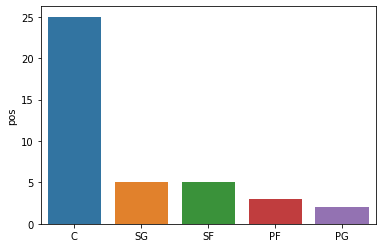

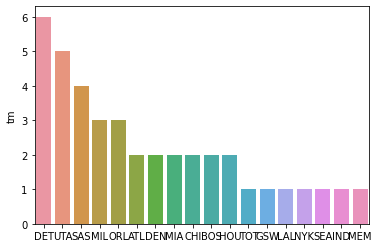

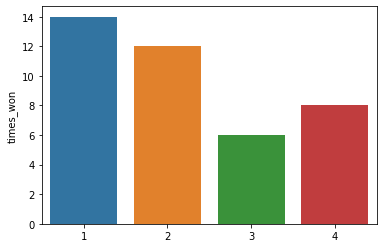

In [38]:
categorical_variables = ['pos', 'tm', 'times_won']
for variable in categorical_variables:
    value_counts = df_dpoy[variable].value_counts()
    chart = sns.barplot(x=value_counts.index,y=value_counts)
    plt.show()

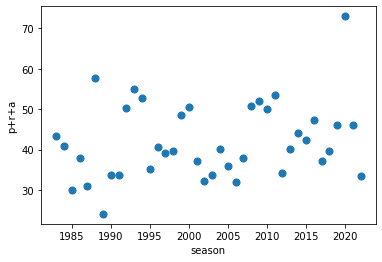

In [14]:
df_dpoy_box_score_sum.plot.scatter(x = 'season', y = 'p+r+a', s = 50);